# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [315]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
from IPython.display import display
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [316]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)

lat_lngs = zip(lats, lngs)
#print(list(zip(lats, lngs)))


# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
#print("list of city : ",cities)

# Print the city count to confirm sufficient count
len(cities)

630

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [317]:

#url =f"https://api.openweathermap.org/data/2.5/weather?"
url ="http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="+weather_api_key
#print(url)
response=requests.get(url)
print(response)

#initialize 
recordNum=1
setNum =1
numCityNotFound =0

# Create a dictionary for weather check dataframe (based on the dataframe given in started code)
weatherCheck_dict = {"city":cities,
                     "lon": "",
                     "lat": "",
                     "Max Temp": "",
                     "Humidity": "",
                     "Cloudiness": "",
                     "Wind Speed": "",
                     "Country": "",
                     "Date": "" }

weatherCheck_data = pd.DataFrame(weatherCheck_dict)

print('''Beginning Data Retrieval
-----------------------------''')
#Loop through list of cities and perform a request for data on each of them

for city in cities:
    
    query_url =f"{url}&q={city}"
    #print(query_url)
    response =requests.get(query_url).json()
    #print(response)
    #Try except block to catch the missing city and skipping that one
    try:
        #print log
        print("Processing Record",recordNum,"of Set",setNum,"|",city)
        #Insert data into dataframe
        weatherCheck_data.loc[weatherCheck_data['city'] == city, 'lon'] = response['coord']['lon']
        weatherCheck_data.loc[weatherCheck_data['city'] == city, 'lat'] = response['coord']['lat']
        weatherCheck_data.loc[weatherCheck_data['city'] == city, 'Max Temp'] = response['main']['temp_max']
        weatherCheck_data.loc[weatherCheck_data['city'] == city, 'Humidity'] = response['main']['humidity']
        weatherCheck_data.loc[weatherCheck_data['city'] == city, 'Cloudiness'] = response['clouds']['all']
        weatherCheck_data.loc[weatherCheck_data['city'] == city, 'Wind Speed'] = response['wind']['speed']
        weatherCheck_data.loc[weatherCheck_data['city'] == city, 'Country'] = response['sys']['country']
        weatherCheck_data.loc[weatherCheck_data['city'] == city, 'Date'] = response['dt']
    except :
        print("City not found. Skipping...")
        numCityNotFound+=1
        
    #increment the record num count
    recordNum+=1
    #Condition to print sets by breakig the records into 50 each
    if recordNum == 51:
        setNum+=1
        recordNum =1
        #time.sleep(60)
      
print('''   
-----------------------------
Data Retrieval Complete      
-----------------------------''')

print("**Number of Cities Not found: ",numCityNotFound)

<Response [400]>
Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | chuy
Processing Record 2 of Set 1 | new norfolk
Processing Record 3 of Set 1 | barrow
Processing Record 4 of Set 1 | almenevo
City not found. Skipping...
Processing Record 5 of Set 1 | saint-philippe
Processing Record 6 of Set 1 | chifeng
Processing Record 7 of Set 1 | guerrero negro
Processing Record 8 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | mahebourg
Processing Record 11 of Set 1 | bukachacha
Processing Record 12 of Set 1 | kahului
Processing Record 13 of Set 1 | luanda
Processing Record 14 of Set 1 | cape town
Processing Record 15 of Set 1 | mataura
Processing Record 16 of Set 1 | butaritari
Processing Record 17 of Set 1 | tasiilaq
Processing Record 18 of Set 1 | fuquay-varina
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | sentyabrskiy
City not found. Skipping...
Proces

Processing Record 31 of Set 4 | shambu
Processing Record 32 of Set 4 | ponta do sol
Processing Record 33 of Set 4 | lisala
Processing Record 34 of Set 4 | nuuk
Processing Record 35 of Set 4 | ostrovnoy
Processing Record 36 of Set 4 | vitim
Processing Record 37 of Set 4 | ancud
Processing Record 38 of Set 4 | okha
Processing Record 39 of Set 4 | iqaluit
Processing Record 40 of Set 4 | sarti
Processing Record 41 of Set 4 | saposoa
Processing Record 42 of Set 4 | tarudant
City not found. Skipping...
Processing Record 43 of Set 4 | saskylakh
Processing Record 44 of Set 4 | thinadhoo
Processing Record 45 of Set 4 | aklavik
Processing Record 46 of Set 4 | sortland
Processing Record 47 of Set 4 | ahipara
Processing Record 48 of Set 4 | coquimbo
Processing Record 49 of Set 4 | constitucion
Processing Record 50 of Set 4 | kodiak
Processing Record 1 of Set 5 | itupiranga
Processing Record 2 of Set 5 | ossora
Processing Record 3 of Set 5 | arraial do cabo
Processing Record 4 of Set 5 | high level

Processing Record 20 of Set 8 | yulara
Processing Record 21 of Set 8 | jining
Processing Record 22 of Set 8 | diamantino
Processing Record 23 of Set 8 | bonfim
Processing Record 24 of Set 8 | guhagar
Processing Record 25 of Set 8 | bastrop
Processing Record 26 of Set 8 | wells
Processing Record 27 of Set 8 | fartura
Processing Record 28 of Set 8 | marau
Processing Record 29 of Set 8 | rodez
Processing Record 30 of Set 8 | pathein
Processing Record 31 of Set 8 | bokhan
Processing Record 32 of Set 8 | progreso
Processing Record 33 of Set 8 | tarata
Processing Record 34 of Set 8 | adrar
Processing Record 35 of Set 8 | quelimane
Processing Record 36 of Set 8 | taksimo
Processing Record 37 of Set 8 | koutsouras
Processing Record 38 of Set 8 | tres arroyos
Processing Record 39 of Set 8 | cananea
Processing Record 40 of Set 8 | monte carmelo
Processing Record 41 of Set 8 | hobyo
Processing Record 42 of Set 8 | otradnoye
Processing Record 43 of Set 8 | sabha
Processing Record 44 of Set 8 | sin

Processing Record 11 of Set 12 | yilan
Processing Record 12 of Set 12 | longlac
City not found. Skipping...
Processing Record 13 of Set 12 | suao
City not found. Skipping...
Processing Record 14 of Set 12 | wattegama
Processing Record 15 of Set 12 | barcelos
Processing Record 16 of Set 12 | koboldo
City not found. Skipping...
Processing Record 17 of Set 12 | cumbitara
Processing Record 18 of Set 12 | gandajika
Processing Record 19 of Set 12 | mocuba
Processing Record 20 of Set 12 | falun
Processing Record 21 of Set 12 | kostino
Processing Record 22 of Set 12 | hirado
Processing Record 23 of Set 12 | scarborough
Processing Record 24 of Set 12 | la esperanza
Processing Record 25 of Set 12 | donskoye
Processing Record 26 of Set 12 | fort-shevchenko
Processing Record 27 of Set 12 | shushtar
Processing Record 28 of Set 12 | dolores
Processing Record 29 of Set 12 | rawatsar
Processing Record 30 of Set 12 | manta
Processing Record 31 of Set 12 | dalby
Processing Record 32 of Set 12 | birjand


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [410]:
#export data to csv file
#removing the cities NaN 
weatherCheck_cleandata=weatherCheck_data.dropna()
weatherCheck_cleandata.reset_index(drop=True)
weatherCheck_cleandata.head(10)
weatherCheck_cleandata.to_csv("OutputFiles/CityData.csv", index=False, header=True)

#display dataframe
display(weatherCheck_cleandata.head(15))

,city,lon,lat,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,chuy,-53.4616,-33.6971,56.57,99.0,100.0,8.30,UY,1.659581e+09
1,new norfolk,147.0587,-42.7826,62.92,46.0,4.0,9.89,AU,1.659581e+09
2,barrow,-156.7887,71.2906,48.22,81.0,75.0,18.41,US,1.659581e+09
4,saint-philippe,55.7679,-21.3585,63.99,83.0,55.0,9.71,RE,1.659581e+09
5,chifeng,118.9636,42.2683,91.56,44.0,79.0,11.54,CN,1.659581e+09
6,guerrero negro,-114.0611,27.9769,71.06,83.0,4.0,16.96,MX,1.659581e+09
8,punta arenas,-70.9167,-53.1500,37.51,93.0,75.0,11.50,CL,1.659581e+09
9,mahebourg,57.7000,-20.4081,68.29,77.0,40.0,8.05,MU,1.659581e+09
10,bukachacha,116.9167,52.9833,61.63,99.0,100.0,3.18,RU,1.659581e+09
11,kahului,-156.4700,20.8947,84.22,68.0,75.0,19.57,US,1.659581e+09


In [411]:
#In order to get summary of data using DESCRIBE FUNCTION, the values must be in Integer format
print("*****What are the data types ?******")
display(weatherCheck_data.dtypes)

#Convert necessary column to integer
weatherCheck_data[['lon','lat','Max Temp','Humidity','Cloudiness','Wind Speed','Date']]=weatherCheck_data[['lon','lat','Max Temp','Humidity','Cloudiness','Wind Speed','Date']].apply(pd.to_numeric)

    
#Summarize the data
display(weatherCheck_data.describe())


*****What are the data types ?******


city           object
lon           float64
lat           float64
Max Temp      float64
Humidity      float64
Cloudiness    float64
Wind Speed    float64
Country        object
Date          float64
dtype: object

,lon,lat,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,5.800000e+02
mean,18.760694,20.098345,69.281241,72.446552,55.058621,7.698086,1.659581e+09
std,90.587313,33.586479,12.561643,18.999107,40.297598,5.438717,7.374808e+01
min,-175.200000,-54.800000,34.970000,1.000000,0.000000,0.000000,1.659580e+09
25%,-58.686950,-8.963550,60.880000,61.000000,12.000000,3.755000,1.659581e+09
50%,24.698350,23.758350,69.720000,76.000000,68.500000,6.610000,1.659581e+09
75%,100.342500,49.257975,79.292500,87.000000,99.000000,10.360000,1.659581e+09
max,178.416700,78.218600,100.330000,100.000000,100.000000,32.820000,1.659581e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [412]:
print("After Inspection from the summary stats , humidity has not gone above 100% ")



After Inspection from the summary stats , humidity has not gone above 100% 


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

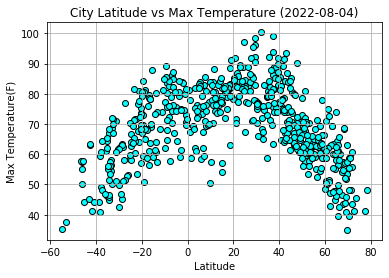

In [413]:
#format the max date in the dataset as "runDate" for graph titles
date = weatherCheck_cleandata["Date"].max()
weatherDate = datetime.utcfromtimestamp(date).strftime('%Y-%m-%d')

plt.title(f"City Latitude vs Max Temperature ({weatherDate})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")
plt.grid()

plt.scatter(weatherCheck_cleandata['lat'], weatherCheck_cleandata["Max Temp"],c='cyan', edgecolors="black")
plt.savefig("Images/Latitude_vs_Temperature_Plot.png")
plt.show()

In [414]:
### Insights on Latitude vs. Temperature Plot
## This plot shows that temperature rises at equator(latitude = 0) and falls at either ends of axis with latitute -60 and -80.


## Latitude vs. Humidity Plot

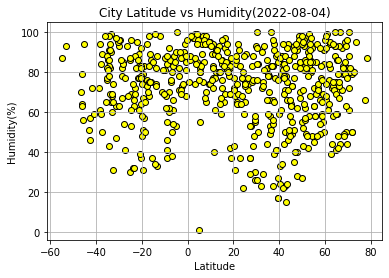

In [415]:
plt.title(f"City Latitude vs Humidity({weatherDate})")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.grid()

plt.scatter(weatherCheck_cleandata['lat'], weatherCheck_cleandata["Humidity"],c='yellow', edgecolors="black")
plt.savefig("Images/Latitude_vs_Humidity_Plot.png")
plt.show()

In [416]:
### Insights on Latitude vs. Humidity Plot
## This plot shows that humidity is never at a lowest point at the equator (latitude 0).
## It also reveals that all the cities at equator will have a atleast 75% humidity. 

## Latitude vs. Cloudiness Plot

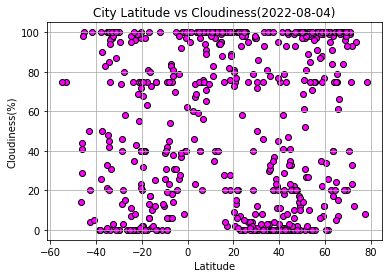

In [417]:
plt.title(f"City Latitude vs Cloudiness({weatherDate})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.grid()

plt.scatter(weatherCheck_cleandata['lat'], weatherCheck_cleandata["Cloudiness"],c='magenta', edgecolors="black")
plt.savefig("Images/Latitude_vs_Cloudiness_Plot.png")
plt.show()

In [418]:
### Insights on Latitude vs. Cloudiness Plot
## This graph may not show any correlation but its interesting to observe the density of cities that 100% cloudy and 0% cloudy

## Latitude vs. Wind Speed Plot

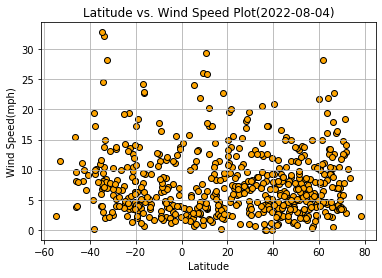

In [419]:
plt.title(f"Latitude vs. Wind Speed Plot({weatherDate})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.grid()

plt.scatter(weatherCheck_cleandata['lat'], weatherCheck_cleandata["Wind Speed"],c='orange', edgecolors="black")
plt.savefig("Images/Latitude_vs_WindSpeed_Plot.png")
plt.show()

In [420]:
### Insights on Latitude vs. Wind Speed Plot Plot
## This plot doesn't show any major correlation

## Linear Regression

In [443]:
#Creating a function so it gets call everytime when it needs the execute same code multiple time

def linearRegression(x,y,xy_1,xy_2):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    regress_values = x * slope + intercept
    line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(line_equation)
    print(f'The r-square is: {rvalue}')
    
    plt.scatter(x,y,facecolors="violet",edgecolors='red')
    plt.plot(x,regress_values,"r-",color="purple")
    plt.annotate(line_equation,(xy_1,xy_2),fontsize=15,color="purple")

  

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

y = -0.39x + 86.2
The r-square is: -0.6291290604422828


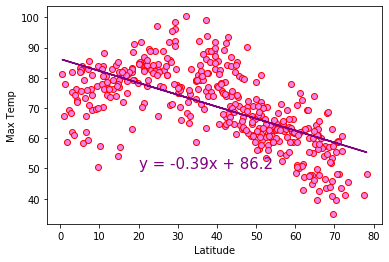

In [445]:
#Data just for northern hemisphere, creating another dataframe
northHemp_data = weatherCheck_cleandata.loc[weatherCheck_cleandata["lat"] > 0]

x = northHemp_data["lat"]
y = northHemp_data["Max Temp"]
xy_1=20
xy_2=50

#Can the defined function and pass the parameters
plt.xlabel("Latitude",fontsize=10)
plt.ylabel("Max Temp",fontsize=10)

linearRegression(x,y,xy_1,xy_2)
plt.savefig(f"Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression ({weatherDate}).png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

y = 0.66x + 80.55
The r-square is: 0.701002467502045


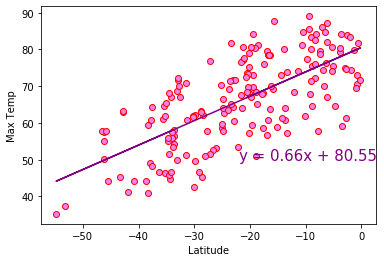

In [447]:
#Data just for sourthern hemisphere, creating another dataframe
southHemp_data = weatherCheck_cleandata.loc[weatherCheck_cleandata["lat"] < 0]

x = southHemp_data["lat"]
y = southHemp_data["Max Temp"]
xy_1=-22
xy_2=50

#Can the defined function and pass the parameters
plt.xlabel("Latitude",fontsize=10)
plt.ylabel("Max Temp",fontsize=10)
linearRegression(x,y,xy_1,xy_2)
plt.savefig(f"Images/Southern Hemisphere - Max Temp vs. Latitude Linear Regression ({weatherDate}).png")
plt.show()

In [424]:
### Insights on Northwern and Southern Hemisphere - Max Temp vs. Latitude Linear Regression
## This graph shows a  strong correlation. 
## In the northern hemisphere the temperature decreasses as we go away from equator(Latitute =0) and in southern it is opposite

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = -0.09x + 75.57
The r-square is: -0.08825960649282108


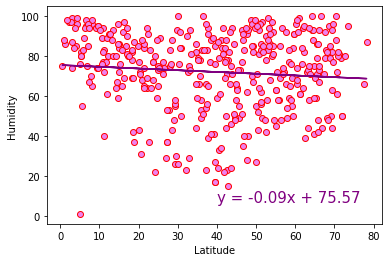

In [448]:
#Data just for northern hemisphere, creating another dataframe
northHemp_data = weatherCheck_cleandata.loc[weatherCheck_cleandata["lat"] > 0]

x = northHemp_data["lat"]
y = northHemp_data["Humidity"]
xy_1=40
xy_2=7

#Can the defined function and pass the parameters
plt.xlabel("Latitude",fontsize=10)
plt.ylabel("Humidity",fontsize=10)
linearRegression(x,y,xy_1,xy_2)
plt.savefig(f"Images/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression ({weatherDate}).png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.01x + 73.25
The r-square is: 0.005720226745982871


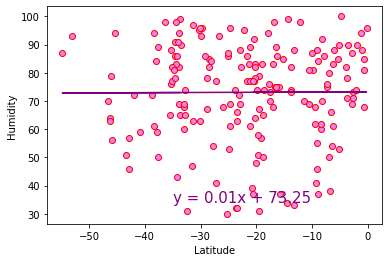

In [449]:
#Data just for southern hemisphere, creating another dataframe
southHemp_data = weatherCheck_cleandata.loc[weatherCheck_cleandata["lat"] < 0]

x = southHemp_data["lat"]
y = southHemp_data["Humidity"]
xy_1=-35
xy_2=34

#Can the defined function and pass the parameters
plt.xlabel("Latitude",fontsize=10)
plt.ylabel("Humidity",fontsize=10)
linearRegression(x,y,xy_1,xy_2)
plt.savefig(f"Images/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression ({weatherDate}).png")
plt.show()

In [427]:
### Insights on Northwern and Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
## There is no correlation between Humidity and latitude

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = -0.06x + 61.13
The r-square is: -0.0299254426318998


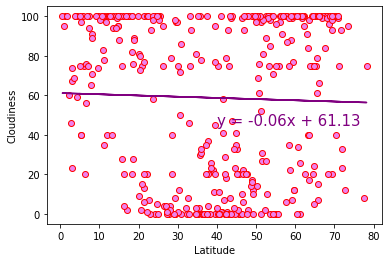

In [450]:
#Data just for northern hemisphere, creating another dataframe
northHemp_data = weatherCheck_cleandata.loc[weatherCheck_cleandata["lat"] > 0]

x = northHemp_data["lat"]
y = northHemp_data["Cloudiness"]
xy_1=40
xy_2=45

#Can the defined function and pass the parameters
plt.xlabel("Latitude",fontsize=10)
plt.ylabel("Cloudiness",fontsize=10)
linearRegression(x,y,xy_1,xy_2)
plt.savefig(f"Images/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression ({weatherDate}).png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = -0.18x + 43.13
The r-square is: -0.059457787131807306


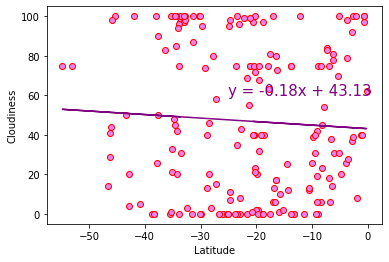

In [451]:
#Data just for southern hemisphere, creating another dataframe
southHemp_data = weatherCheck_cleandata.loc[weatherCheck_cleandata["lat"] < 0]

x = southHemp_data["lat"]
y = southHemp_data["Cloudiness"]
xy_1=-25
xy_2=60

#Can the defined function and pass the parameters
plt.xlabel("Latitude",fontsize=10)
plt.ylabel("Cloudiness",fontsize=10)
linearRegression(x,y,xy_1,xy_2)
plt.savefig(f"Images/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression ({weatherDate}).png")
plt.show()

In [430]:
### Insights on Northwern and Southern Hemisphere -Cloudiness (%) vs. Latitude Linear Regression
## There is no correlation between cloudiness and latitude

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = 0.0x + 7.41
The r-square is: 0.008244158011925696


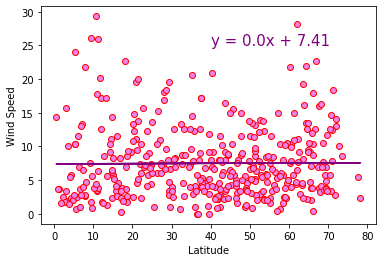

In [452]:
#Data just for northern hemisphere, creating another dataframe
northHemp_data = weatherCheck_cleandata.loc[weatherCheck_cleandata["lat"] > 0]

x = northHemp_data["lat"]
y = northHemp_data["Wind Speed"]
xy_1=40
xy_2=25

#Can the defined function and pass the parameters
plt.xlabel("Latitude",fontsize=10)
plt.ylabel("Wind Speed",fontsize=10)
linearRegression(x,y,xy_1,xy_2)
plt.savefig(f"Images/Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression ({weatherDate}).png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = -0.07x + 6.55
The r-square is: -0.15962718024081368


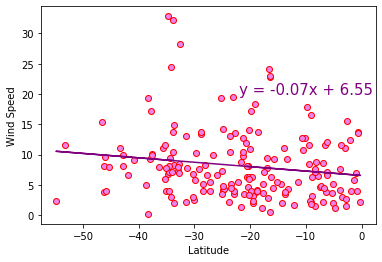

In [453]:
#Data just for northern hemisphere, creating another dataframe
southHemp_data = weatherCheck_cleandata.loc[weatherCheck_cleandata["lat"] < 0]

x = southHemp_data["lat"]
y = southHemp_data["Wind Speed"]
xy_1=-22
xy_2=20

#Can the defined function and pass the parameters
plt.xlabel("Latitude",fontsize=10)
plt.ylabel("Wind Speed",fontsize=10)
linearRegression(x,y,xy_1,xy_2)
plt.savefig(f"Images/Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression ({weatherDate}).png")
plt.show()

In [433]:
#### Insights on Northwern and Southern Hemisphere -Wind Speed (mph) vs. Latitude Linear Regression
#### There is no correlation between Wind Speed and latitude.